# test


In [2]:
sysuse "auto.dta", clear

describe

(1978 automobile data)

Contains data from D:\stata17/ado\base/a/auto.dta
 Observations:            74                  1978 automobile data
    Variables:            12                  13 Apr 2020 17:45
                                              (_dta has notes)
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
make            str18   %-18s                 Make and model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g                 Repair record 1978
headroom        float   %6.1f                 Headroom (in.)
trunk           int     %8.0g                 Trunk space (cu. ft.)
weight          int     %8.0gc                Weight (lbs.)
length          int     %8.0g              

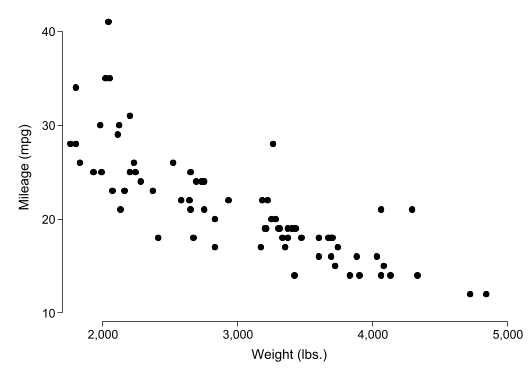

In [6]:
set scheme scientific
scatter mpg weight

(bin=8, start=12, width=3.625)


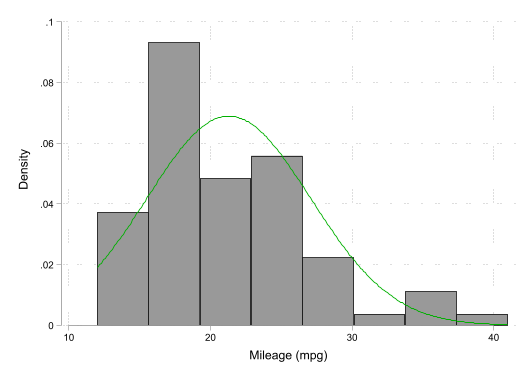

In [8]:
histogram mpg, normal scheme(cleanplots)

In [ ]:
qui reg mpg weight
est store m1 
qui reg mpg weight foreign
est store m2

local m "m1 m2"
esttab `m', nogap compress replace   ///
       b(%6.3f) s(N r2_a) drop(`drop')   ///
       star(* 0.1 ** 0.05 *** 0.01)      ///
		 addnotes("*** 1% ** 5% * 10%") 


------------------------------------
                 (1)          (2)   
                 mpg          mpg   
------------------------------------
weight        -0.006***    -0.007***
            (-11.60)     (-10.34)   
foreign                    -1.650   
                          (-1.53)   
_cons         39.440***    41.680***
             (24.44)      (19.25)   
------------------------------------
N             74.000       74.000   
r2_a           0.647        0.653   
------------------------------------
t statistics in parentheses
*** 1% ** 5% * 10%
* p<0.1, ** p<0.05, *** p<0.01


In [14]:
*-Stata 基本参数
  about           // 版本号等



Stata/MP 17.0 for Windows (64-bit x86-64)
Revision 16 May 2023
Copyright 1985-2021 StataCorp LLC

Total physical memory:       64.00 GB
Available physical memory:   34.93 GB

Stata license: Single-user 4-core  perpetual
Serial number: 501706332621
  Licensed to: StataGay
               zz


In [ ]:
  set             // 系统参数及设定
  cret list       // 系统参数引用
  
  help whatsnew   // Stata 更新记录
  


In [16]:
  which summarize 
  dis "================="
  which winsor2   // 外部命令的安装位置和版本号
  


built-in command:  summarize
D:/stata/plus\w\winsor2.ado
*! Inspirit of -winsor-(NJ Cox) and -winsorizeJ-(J Caskey)
*! Lian Yujun, arlionn@163.com, 2013-12-25
*! 1.1 2014.12.16


In [17]:
  sysdir          // 系统路径

   STATA:  D:\stata17/
    BASE:  D:\stata17/ado\base\
    SITE:  D:\stata17/ado\site\
    PLUS:  D:/stata/plus\
PERSONAL:  D:/stata/personal\
OLDPLACE:  c:\ado\


In [ ]:
*-编辑和浏览数据  
  sysuse "auto.dta", clear
  edit                           //编辑数据, 能修改数据
  browse price wei mpg foreign rep78 //浏览数据,不能修改数据, 可以指定一部分变量

(1978 automobile data)
command edit is unrecognized
r(199);


In [ ]:

format price wei len mpg %6.3f //定义变量的显示格式
list   price wei len mpg in 1/3


     +----------------------------------------+
     |    price     weight    length      mpg |
     |----------------------------------------|
  1. | 4099.000   2930.000   186.000   22.000 |
  2. | 4749.000   3350.000   173.000   17.000 |
  3. | 3799.000   2640.000   168.000   22.000 |
     +----------------------------------------+


In [28]:
list price foreign in 51/54

dis _n "========with nolabel option========="
list price foreign in 51/54, nolabel      //browse 的简写，此时列示原始数据而不是标签 


     +---------------------+
     |    price    foreign |
     |---------------------|
 51. | 4424.000   Domestic |
 52. | 4172.000   Domestic |
 53. | 9690.000    Foreign |
 54. | 6295.000    Foreign |
     +---------------------+

========with nolabel option=========

     +--------------------+
     |    price   foreign |
     |--------------------|
 51. | 4424.000         0 |
 52. | 4172.000         0 |
 53. | 9690.000         1 |
 54. | 6295.000         1 |
     +--------------------+
